<a href="https://colab.research.google.com/github/MiguelGoes/VMP/blob/main/FINAL_MVP2_2_julho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Trabalho 2 da segunda sprint**

 Aluno: Miguel Costa Góes
 Neste trabalho será utlilizado uma dataset Satellite Image Classification, que possui imagens de quatro tipos:

1.   Imagem de massas d'água
2.   Imagem de deserto
3.   Imagem de florestas ou zonas verdes
4.   Imagem de nuvens

 Esse dataset foi retirado do site kaggle, podendo ser acessado pelo link:
 https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification

Esse dataset possui um total de 5625 imagens dos quatro tipos mencionados anteriormente.
A ideia principal é fazer um código que consigar aprender  a classificar imagens em um desses quatro tipos apartir de um conunto de imagens de exemplo.







Importação das bibliotecas utulizadas no projeto:

In [ ]:
#  Carregamento das bibliotecas que serão utilizadas ao longo do projeto:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image, ImageFilter

 Todas as imagens foram carregadas no Drive para facilitar a utilização. Nesse passo será carregando as imagens do dataset, criando uma lista com as imagens e com os labels de cada imagem.

In [ ]:
# Definir o caminho para o diretório contendo as imagens
url = '/content/drive/MyDrive/Colab Notebooks/sprint2/imagens'
dataset_path = url

# Para esse modelo o número de classes é igual a 4
# que são: nuvem, corpo d'água, deserto e floresta
num_clas = 4 # número de classes
normal = 0 # variavel auxiliar, que será utilizada em outra parte do código
#para garantir que as imagens foram normalizadas.

# Listar os arquivos de imagem no diretório
image_files = os.listdir(dataset_path)

# Inicializar as listas para armazenar as imagens e os rótulos
images = [] # lista com as imagens
labels = [] # lista com os titulos das imagens

# Percorrer os arquivos de imagem
for filename in image_files:
    # Carregar a imagem usando o Keras
    image = load_img(os.path.join(dataset_path, filename), target_size=(64, 64))
    # Converter a imagem em um array numpy
    image_array = img_to_array(image)
    # Adicionar a imagem às lista de imagens
    images.append(image_array)

    # Extrair o rótulo da imagem a partir do nome do arquivo.
    # Como esse dataset não possui um arquivo com os labels das imagens, foi
    # necessario coletar os labels utilizando os nomes de cada imagem.
    # Depois de estrarir o nome das imagens para identificar de que tipo de
    # imagem se trata foi convertido os rótulos em valores numericos para
    # a identificação.

    label = filename.split('.')[0]  # Assume que o rótulo está antes do ponto
    #na extensão do arquivo.
    if label[:4]=='trai':
        #label = 'nuvem'
        label = 0
        #indica que o label se trata de uma imagem de uma nuvem.
    elif label[:4]=='SeaL':
        #label = 'lago'
        label = 1
        # indica qque o label se trata de uma imagem de um corpo d'agua.
    elif label[:4]=='dese':
        #label = 'deserto'
        label = 2
        # indica que o label se trata de uma imagem de um deserto.
    elif label [:4]=='Fore':
        #label = 'floresta'
        label = 3
        # indica que a imagem se trata de uma floresta.
    else: print('erro ao salvar imagens')
    labels.append(label)

# Área de impressão:
print(labels[1]) # impressão para verificação do label.
print('A quantidade total de itens trabalhadas:')
print(len(labels)) # impressão do número total de imagens trabalhadas.
print(type(labels)) # impressão para verificar o tipo de objeto.
# Verificando se os nomes dos labels foram salvos com sucesso.

print('A quantidade de itens com labels 0 é:')
print(labels.count(0))#impressão da quantidade de itens com labels 0.

print('A quantidade de itens com labels 1 é: ')
print(labels.count(1))#impressão da quantidade de itens com labels 1.

print('A quantidade de itens com labels 2 é: ')
print(labels.count(2))#impressão da quantidade de itens com labels 2.

print('A quantidade de itens com labels 3 é:')
print(labels.count(0)) #impressão da quantidade de itens com labels 3.

1
A quantidade total de itens trabalhadas:
5625
<class 'list'>
A quantidade de itens com labels 0 é:
1500
A quantidade de itens com labels 1 é: 
1500
A quantidade de itens com labels 2 é: 
1125
A quantidade de itens com labels 3 é:
1500


 visualização de uma labels e uma imagem qualquer para verificar se está executando como planejado.


O tipo da imagem 4045 é 0 :

O tipo da varial labels é <class 'list'>

: 


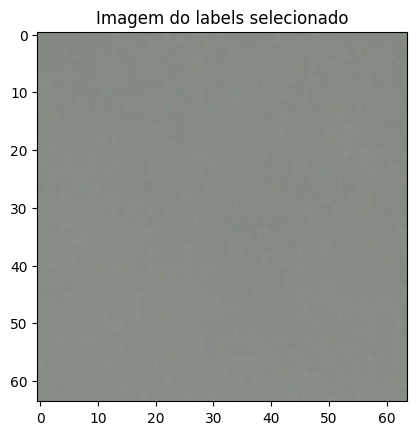

In [ ]:
# impressão de um label aleatório para verificação
valor = random.randint(0, len(labels))
print('O tipo da imagem {} é {} :\n'.format(valor ,labels[valor]))
print('O tipo da varial labels é {}\n\n: '.format (type(labels)))

# impressão de uma imagem aleatório para verificação
imagem_selecionada = images[valor]
plt.title('Imagem do labels selecionado')
plt.imshow(imagem_selecionada.astype(np.uint8))
plt.show()

# label = 0 indica que o label se trata de uma imagem de uma nuvem.
# label = 1 indica qque o label se trata de uma imagem de um corpo d'agua.
# label = 2 indica que o label se trata de uma imagem de um deserto.
# label = 3 indica que a imagem se trata de uma floresta.

  Realizar a modificação do objeto que está guardando os labls, modifica de list para um numpy.ndarray. Essa modificação é necessária para a utilização futura do dado.
   

In [ ]:
# Realizar a modificação de list para numpy.ndarray

print('Formato atual {}:\n'.format(type(labels))) #verificação do formato atual.

print('Verificação da quantidade de dados no formato atual {}\n'
.format(len(labels)))# verificação da quantidade de dados no formato atual
labels_array = np.array(labels) # método de modificação.

print('Verificação do novo formato{}:\n'.format(type(labels_array)))
# Verificação do novo formato.

print('Verificação da quantidade de dados no novo formato'
.format(labels_array[3243]))#verificação da quantidade de dados no novo formato.

Formato atual <class 'list'>:

Verificação da quantidade de dados no formato atual 5625

Verificação do novo formato<class 'numpy.ndarray'>:

Verificação da quantidade de dados no novo formato


 Antes de passar para o práoximo passo de tratamento das imagens é verificando se os dos labels nomes foram alterados com sucesso, e o formato da imagem está correta.
  Escolhidas imagens em várias faixas de posição no dataset.

In [ ]:
# Vealizar a impressão dos formatos das imagens e labels
# verificação para a imagem 1
print('A imagem 1 possui um formato {}'.format(images[1].shape))
print('O label da imagem 1 é {}'.format(labels[1]))

#Verificação para a imagem 2000
print('A imagem 2000 possui um formato {}'.format(images[2000].shape))
print('O label da imagem 2000 é {}'.format(labels[2000]))

#Verificação para a imagem 3500
print('A imagem 3500 possui um formato {}'.format(images[3500].shape))
print('O label da imagem 3500 é {}'.format(labels[3500]))

#Verificação para a imagem 3500
print('A imagem 5000 possui um formato {}'.format(images[5000].shape))
print('O label da imagem 5000 é {}'.format(labels[5000]))

# Impressão dse um pixel da imagem
print(images[2][1][1])

A imagem 1 possui um formato (64, 64, 3)
O label da imagem 1 é 1
A imagem 2000 possui um formato (64, 64, 3)
O label da imagem 2000 é 2
A imagem 3500 possui um formato (64, 64, 3)
O label da imagem 3500 é 3
A imagem 5000 possui um formato (64, 64, 3)
O label da imagem 5000 é 0
[23. 40. 66.]


In [ ]:
print(type(images))
print(type(labels_array))

<class 'list'>
<class 'numpy.ndarray'>


 Conversão do formato das imagens, de lista para np.array. Essa conversão e necessária para utilização futura do arquivo.

In [ ]:
# Converter as listas em arrays numpy
images = np.array(images)

# Pré-processamento dos dados
# Normalizando os valores de pixels ( valores de 0 a 1)
print((images[2][1][1][1]))

if normal == 0:
    images = images.astype('float32')
    images /= 255
    print(type(images))
    print(images.shape)
    print(images[1].shape)
    print(type(labels_array))
    print('valores foram normalizados')
else :
  print('valores já normalizados')
normal = 1
 # Verificação se a imagem já foi normalizada, essa verificação
 # evita erros de operação, como normalizar duas vezes as imagens
formato_imagem = images.shape

40.0
<class 'numpy.ndarray'>
(5625, 64, 64, 3)
(64, 64, 3)
<class 'numpy.ndarray'>
valores foram normalizados


 Impressão dos pixels de uma imagem qualquer verificação da normalização, nela os valores devem sempre está entre 0 e 1.

In [ ]:
print(images[2][1]) # impressão de um imagens qualquer.

[[0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.08627451 0.15686275 0.2509804 ]
 [0.09019608 0.16078432 0.25490198]
 [0.09019608 0.16078432 0.25490198]
 [0.09019608 0.16078432 0.25490198]
 [0.09019608 0.15686275 0.25882354]
 [0.09411765 0.16078432 0.2627451 ]
 [0.09411765 0.16078432 0.2627451 ]
 [0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.09411765 0.16078432 0.2627451 ]
 [0.09019608 0.16078432 0.24705882]
 [0.09411765 0.16470589 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.08627451 0.15294118 0.25490198]
 [0.09019608 0.15686275 0.25882354]
 [0.08627451 0.15686275 0.2509804 ]
 [0.09019608 0.16078432 0.25490198]
 [0.09411765 0.16470589 0.25882354]
 [0.09019608 0.15686275 0.25882354]
 [0.08627451 0.15294118 0.25490198]
 [0.09019608 0.15686275 0.25882354]
 [0.09019608 0.15686275 0.25

 Separar o conjunto de imagens em dois, o conjunto para de teste do modelo e o  conjunto que será utilizado para realizar o treinamento do modelo.

In [ ]:
# Realizar a separação das imagens
# Como não tenho um arquivo separado com os nomes de cada imagem será necessário
# separar os dados antes de realizar o treinamento.
# Para esse teste será separado 20% das imagens para testar o modelo
# e 80% das imagens serão utilizadas para o treino.

j = 0
train_images=[]
test_images=[]
test_labels=[]
train_labels=[]
for i in range(len(images)):
    if j%5==0:
        test_images.append(images[j])
        test_labels.append(labels_array[j])
    else:
        train_images.append(images[j])
        train_labels.append(labels_array[j])
    j = j +1

print(len(train_images))
print(len(test_images))

print('Quantidade de imagens de treino é {} '.format(len(train_images)))
print('Quantidade de labels de treino é {}'.format(len(train_labels)))
print('Quantidade de imagens de teste é {}'.format(len(test_images)))
print('Quantidade de labels de teste é {}'.format(len(test_labels)))

train_images =np.array(train_images)
test_images =np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

4500
1125
Quantidade de imagens de treino é 4500 
Quantidade de labels de treino é 4500
Quantidade de imagens de teste é 1125
Quantidade de labels de teste é 1125


 Criando um modelo de rede neural convolocional CNN

In [ ]:
# Criar o modelo da CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(num_clas, activation='softmax'))

# Compilar o modelo
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

 Depois do modelo criado vamos treinar o modelo

In [ ]:
train_labels = to_categorical(train_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)

In [ ]:
# Treinar o modelo
epochs = 10
model.fit(train_images, train_labels,epochs=epochs)

Epoch 1/10
141/141 [==============================] - 342s 2s/step - loss: 1.3223 - accuracy: 0.2627
Epoch 2/10
141/141 [==============================] - 334s 2s/step - loss: 1.2255 - accuracy: 0.3204
Epoch 3/10
141/141 [==============================] - 343s 2s/step - loss: 1.0965 - accuracy: 0.5211
Epoch 4/10
141/141 [==============================] - 343s 2s/step - loss: 0.9506 - accuracy: 0.6131
Epoch 5/10
141/141 [==============================] - 333s 2s/step - loss: 0.8292 - accuracy: 0.6467
Epoch 6/10
141/141 [==============================] - 330s 2s/step - loss: 0.7409 - accuracy: 0.6616
Epoch 7/10
141/141 [==============================] - 320s 2s/step - loss: 0.6836 - accuracy: 0.6671
Epoch 8/10
141/141 [==============================] - 328s 2s/step - loss: 0.6373 - accuracy: 0.6969
Epoch 9/10
141/141 [==============================] - 321s 2s/step - loss: 0.6057 - accuracy: 0.7091
Epoch 10/10
141/141 [==============================] - 326s 2s/step - loss: 0.5848 - accura

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

36/36 - 19s - loss: 0.5503 - accuracy: 0.7973 - 19s/epoch - 519ms/step


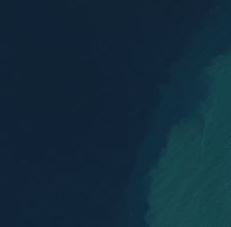

In [ ]:
# fazendo teste com uma nova imagem
im = Image.open( '/content/drive/MyDrive/Colab Notebooks/sprint2/Capturar.JPG' )
#Display image
im.show()

In [ ]:
# tratando a imagem para predição
imredi = im.resize((64, 64))
im_array = (np.array(imredi))/255
imagem_entrada = np.expand_dims(im_array, axis=0)
previsao = model.predict(imagem_entrada)
print(previsao)
classe_predita = np.argmax(previsao)

print("Classe predita:", classe_predita)

# label = 0 indica que o label se trata de uma imagem de uma nuvem.
# label = 1 indica qque o label se trata de uma imagem de um corpo d'agua.
# label = 2 indica que o label se trata de uma imagem de um deserto.
# label = 3 indica que a imagem se trata de uma floresta.

1/1 [==============================] - 0s 228ms/step
[[0.05646327 0.4869992  0.01338195 0.44315562]]
Classe predita: 1
